In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adult_eda.csv")

In [3]:
df.head()
# ilk 5 satırı.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape
# satır ve sutun sayısı.

(32561, 15)

In [5]:
df.info()
# tüm kolonların null olamayan değerleri ve veri tipleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()
# dataseti içinde ki tüm sayısal verilerin istatiksel değerlerini getirir.

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()
# dataframe içinde ki null olan tüm kolonları getirir.

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [9]:
df.columns
# bize sutunları getirir.

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [10]:
df.select_dtypes(object).describe()
# object veri tipinde ki sutunların istatiksel hesapların bakar.

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [11]:
df.workclass.value_counts()
# hangi kolonda değerlerden ne kadar varsa bize gösterir.

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
df[df["workclass"] == "?"]
# workcllasta sadece ? işareti olanları getir dedik. ama tüm kolonlar geçerli

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [15]:
df["workclass"] = df["workclass"].str.replace("?","UNKNOWN")
# df workclass içinde ki ? işaretini değiştirdi.

In [19]:
# 2. yol : 
df = df.replace({"?" : "UNKNOWN"})
df[df["workclass"] == "?"].value_counts()
# bu şekilde de olabilir.

Series([], dtype: int64)

In [20]:
df["education"]

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [21]:
df["education-num"]

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [24]:
df.groupby("education")["education-num"].value_counts()
# burda her education dan education_num sutununda karşılık gelen değerlerden kaç tane var onu gösterir.
# örneğin Doctora yapan 16.0 education numaralı 405 tane kişi var demektir.

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: education-num, dtype: int64

In [25]:
df["education-num"].value_counts()
# education-num kolonunun değerlerinden herbirinden kaçtane eleman var.

9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: education-num, dtype: int64

In [26]:
df.drop("education-num", axis=1, inplace=True)
# education-num kalıcı olarak sildik.

In [27]:
df.corr()
# her sayısal kolonun korelasyon katsayısına baktık.

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [28]:
df.select_dtypes(include=["int64","float64"]).describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [32]:
# age column IQR değeri 
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
IQR

20.0

In [33]:
# age column alt ve ust aykırı sınır değerleri :
alt_sınır = Q1 - (1.5*IQR)
ust_sınır = Q3 + (1.5*IQR)
print("age için alt değer = ", alt_sınır)
print("age için üst değer =", ust_sınır)

age için alt değer =  -2.0
age için üst değer = 78.0


In [37]:
df[df["age"] > ust_sınır]["age"].value_counts()
# age kolonunda üst sınırdan büyük ve eşit değerlerden kaçar tane var 

90    43
80    22
79    22
81    20
82    12
84    10
83     6
88     3
85     3
87     1
86     1
Name: age, dtype: int64

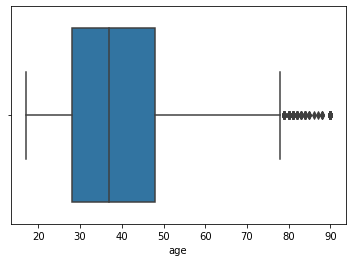

In [39]:
import seaborn as sns
sns.boxplot(x=df["age"]);
# age için tüm outlier değerleri grafik olarak gösterir.

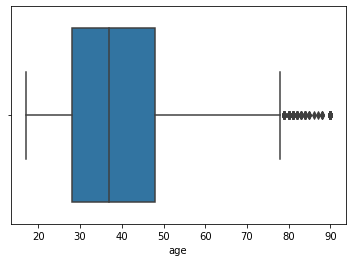

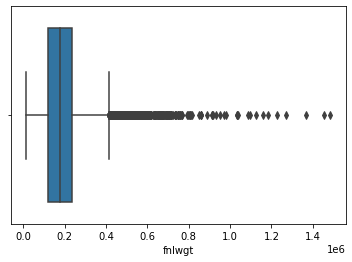

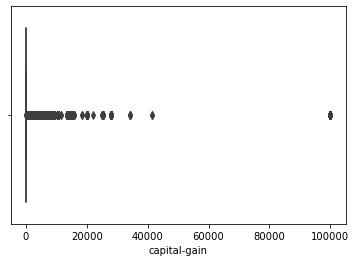

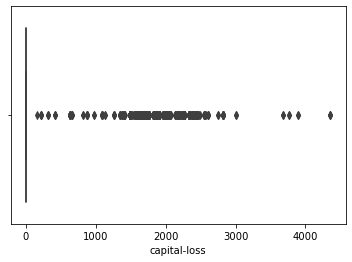

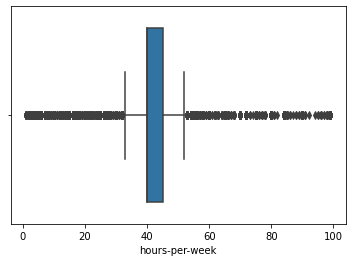

In [48]:
# tüm dataframe de ki outlier değerlere bakalım : 
import seaborn as sns
for i in df.columns[:]:
    if df[i].dtype == "float64" or df[i].dtype == "int64":
        sns.boxplot(x = df[i]);
        plt.show();

In [49]:
# hours per-week için oqr : 
Q1 = df["hours-per-week"].quantile(0.25)
Q3 = df["hours-per-week"].quantile(0.75)
IQR = Q3-Q1
IQR

5.0

In [50]:
# ust sınırı bulalım : 
ust_sınır2 = Q3+(1.5*IQR)
ust_sınır2

52.5

In [51]:
df[(df["age"] > ust_sınır) & (df["hours-per-week"] > ust_sınır2)][["age","hours-per-week"]]
# age ve hours colonların da ki outlier değerleri getirdik. ama üst sınırları için.

,age,hours-per-week
3777,80,60
5370,90,60
7481,83,55
7720,84,66
8806,90,72
11996,90,55
12830,81,60
15356,90,99
24395,83,55


In [52]:
df["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [54]:
df.relationship = df.relationship.replace({np.NaN:"Unmarried", "Not-in-family":"Unmarried", "Other-relative":"Unmarried" })
df["relationship"].value_counts()
# burda nan, Not-in-family ve Other-relative değerlerinin isimlerini Unmarried olarak değiştirdik.

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [56]:
df.relationship.isnull().sum()

0

In [60]:
race_count = df.race.value_counts()
race_count
# ırklara göre kaççalışan var.

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [72]:
avarage_men = df[df["sex"] == "Male"]["age"].mean()
# burda erkeklerin yaş ortalamasını aldık.
avarage_men = round(avarage_men,2)
avarage_men

39.43

In [73]:
avarage_women = df[df["sex"] == "Female"]["age"].mean()
avarage_women = round(avarage_women,2)
avarage_women

36.86

In [77]:
toplam_erkek = df[df["sex"] == "Male"]["age"].value_counts().sum()
toplam_erkek

21790

In [78]:
toplam_kadın = df[df["sex"] == "Female"]["age"].value_counts().sum()
toplam_kadın

10771

In [79]:
toplam_erkek - toplam_kadın

11019

In [81]:
df[df["education"] == "Bachelors"]["education"].value_counts()
# lisans mezunu 5335 kişi var.

Bachelors    5355
Name: education, dtype: int64

In [82]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [83]:
# lisans mezunlarının tüm mezunlara oranı derse : 
toplam = df["education"].value_counts().sum()
lisans = df[df["education"] == "Bachelors"]["education"].value_counts()
100/(toplam/lisans)
# yüzde 16 sı lisans mezunu

Bachelors    16.446055
Name: education, dtype: float64

In [84]:
# 2. yol :
df["education"].value_counts(normalize=True)
# tüm değerlerin toplam değere göre yüzdelik oranları var.

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

In [94]:
df[(df["education"] == "Bachelors") | 
   (df["education"] == "Masters") | (df["education"] == "Doctorate")]["education"].value_counts()
# lisans, yüksek lisans ve doktora yapan kaç kişi var.

Bachelors    5355
Masters      1723
Doctorate     413
Name: education, dtype: int64

In [93]:
df[(df["salary"] == ">50K") &
  (df["education"] == "Bachelors") | (df["education"] == "Masters")
   | (df["education"] == "Doctorate")]["education"].value_counts()
# maaşı 50k dan fazla lisans, yüksek lisans ve doktora yapan kaç kişi var.

Bachelors    2221
Masters      1723
Doctorate     413
Name: education, dtype: int64

In [98]:
# maaşı 50k dan fazla alanlar içinde lisans, yüksek lisans ve doktora yapanların oranı
top50K_fazla = df[df["salary"] == ">50K"]["education"].value_counts().sum()
top50K_lisans = df[(df["salary"] == ">50K") &
  (df["education"] == "Bachelors") | (df["education"] == "Masters")
   | (df["education"] == "Doctorate")]["education"].value_counts().sum()
int(100/(top50K_fazla/top50K_lisans))
# yüzde 55 oranı varmış yani 50k dan fazla alanların %55 i lisans, yüksek lisans ve doktora yapanlar

55

In [102]:
# tüm maaş alanlara göre maaşı 50k dan fazla alanlar içinde lisans, yüksek lisans ve doktora yapanların oranı
top_maas = df.groupby("salary")["education"].value_counts().sum()
int(100/(top_maas/top50K_lisans))
# tüm maaş alan çalışanlar içinde 50k dan fazla alanlar içinde lisans, yüksek lisans ve doktora yapanların oranı % 13 tür.

13

In [175]:
higher_education = (df.education=='Bachelors') | (df.education=='Masters') | (df.education=='Doctorate')
higher_education
# burda ilk önce oluşturduğum koşula göre bir seri yaptık.

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32561, dtype: bool

In [176]:
df_high_edu = df[higher_education]
df_high_edu
# sonra bunu bir dataframeye çevirdim. içinde sadece yukarıda yazdığım koşul var.

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,UNKNOWN,287372,Doctorate,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [177]:
lower_education = ~higher_education
lower_education
# buda higher education dışındakileri al demek.

0        False
1        False
2         True
3         True
4        False
         ...  
32556     True
32557     True
32558     True
32559     True
32560     True
Name: education, Length: 32561, dtype: bool

In [179]:
df_low_edu = df[lower_education]
df_low_edu[df_low_edu["salary"] == ">50K"]["education"].value_counts()
# buda düşük öğrenim görenlerin 50K dan fazla alan kaç kişi var.

HS-grad         1675
Some-college    1387
Prof-school      423
Assoc-voc        361
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

In [112]:
df["hours-per-week"].value_counts()
# en çok 40 saat çalışan varmış. 15217 kişi.

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [119]:
# minimun saat çalışıp 50K dan fazla kazananlar.
df[(df["hours-per-week"] == df["hours-per-week"].min()) & (df["salary"] > "50K")]["hours-per-week"].value_counts()
# 20 kişi varmış.

1    20
Name: hours-per-week, dtype: int64

In [125]:
# toplam tüm çalışanlardan minimun saat çalışıp 50K dan fazla kazananların oranı : 
x = df[(df["hours-per-week"] == df["hours-per-week"].min()) & (df["salary"] > "50K")]["hours-per-week"].value_counts().sum()
x
y = df["hours-per-week"].value_counts().sum()
oran = 100/(y/x)
print(oran)
# yüzde 6 sı kadardır.

0.06142317496391388


In [132]:
# maaş alan ülkeler.
df.groupby("native-country")[["salary"]].count()
# hamgi ülkeden kaç adet maaş alan var

,salary
native-country,
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106
England,90


In [139]:
df[df["salary"] == ">50K"]["native-country"].value_counts(ascending = True)

Honduras                 1
Columbia                 2
Laos                     2
Nicaragua                2
Peru                     2
Trinadad&Tobago          2
Dominican-Republic       2
Thailand                 3
Hungary                  3
Scotland                 3
Guatemala                3
Haiti                    4
Portugal                 4
Ecuador                  4
Vietnam                  5
Ireland                  5
Hong                     6
Yugoslavia               6
Cambodia                 7
Greece                   8
El-Salvador              9
Jamaica                 10
Poland                  12
France                  12
Puerto-Rico             12
South                   16
Iran                    18
Taiwan                  20
China                   20
Japan                   24
Cuba                    25
Italy                   25
England                 30
Mexico                  33
Canada                  39
India                   40
Germany                 44
P

In [140]:
# maaş alam tüm ülkelere göre 50K dan fazla alan ülkelerin oranı : 
ulke_toplam = df.groupby("native-country")[["salary"]].count().sum()
fazla_ulke = df[df["salary"] == ">50K"]["native-country"].value_counts(ascending = True).sum()
oran = 100/(ulke_toplam/fazla_ulke)
oran 
# yüzde 24 imiş.

salary    24.080956
dtype: float64

In [144]:
df[df["salary"] == ">50K"]["native-country"].value_counts(normalize=True)
# buda ülke oranları. 

United-States         0.914552
UNKNOWN               0.018620
Philippines           0.007780
Germany               0.005612
India                 0.005101
Canada                0.004974
Mexico                0.004209
England               0.003826
Italy                 0.003188
Cuba                  0.003188
Japan                 0.003061
China                 0.002551
Taiwan                0.002551
Iran                  0.002296
South                 0.002041
Puerto-Rico           0.001530
France                0.001530
Poland                0.001530
Jamaica               0.001275
El-Salvador           0.001148
Greece                0.001020
Cambodia              0.000893
Yugoslavia            0.000765
Hong                  0.000765
Ireland               0.000638
Vietnam               0.000638
Ecuador               0.000510
Portugal              0.000510
Haiti                 0.000510
Guatemala             0.000383
Scotland              0.000383
Hungary               0.000383
Thailand

In [160]:
df[(df["native-country"]=="Iran") & (df["salary"] == ">50K")]["native-country"].value_counts()

Iran    18
Name: native-country, dtype: int64

In [161]:
df[df["native-country"]=="Iran"]["native-country"].value_counts()

Iran    43
Name: native-country, dtype: int64

In [162]:
100/(43/28)
# iranlıların kendi nufuslarına oranla % 65 i 50K dan fazla almaktaymış.

65.11627906976744

In [163]:
df[(df["native-country"]=="United-States") & (df["salary"] == ">50K")]["native-country"].value_counts()

United-States    7171
Name: native-country, dtype: int64

In [164]:
df[df["native-country"]=="United-States"]["native-country"].value_counts()

United-States    29170
Name: native-country, dtype: int64

In [165]:
100/(29170/7171)
# amerikalıların kendi nufuslarına göre 50K dan fazla alanların oranları %24 tür.

24.583476174151524

In [182]:
df[(df["native-country"] == "Taiwan") & (df["salary"] == ">50K")]["native-country"].value_counts()

Taiwan    20
Name: native-country, dtype: int64

In [183]:
df[df["native-country"] == "Taiwan"]["native-country"].value_counts()

Taiwan    51
Name: native-country, dtype: int64

In [184]:
100/(51/20)
# % yüzde 39 u 50k üzeri alıyor.

39.21568627450981